In [25]:
from sklearn.datasets import load_boston
# from sklearn.model_selection import cross_val_score
# from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [26]:
boston = load_boston()
boston_df = pd.DataFrame(boston.data, columns = boston.feature_names)

boston_df['PRICE'] = boston.target

C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California h

(400, 2)


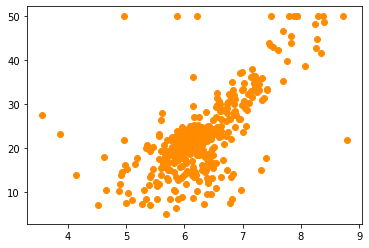

In [27]:
boston_df_sample = boston_df[['RM','PRICE']]
boston_df_sample = boston_df_sample.sample(n=400)
print(boston_df_sample.shape)

plt.figure()
plt.scatter(boston_df_sample['RM'], boston_df_sample['PRICE'], c='darkorange')

In [28]:
boston_df_sample.describe()

,RM,PRICE
count,400.000000,400.000000
mean,6.288817,22.677500
std,0.704677,8.969114
min,3.561000,5.000000
25%,5.886500,17.350000
50%,6.210000,21.200000
75%,6.618250,25.525000
max,8.780000,50.000000


In [29]:
from sklearn.tree import DecisionTreeRegressor # 의사결정나무회귀
from sklearn.ensemble import RandomForestRegressor # 랜포회귀
from sklearn.linear_model import LinearRegression # 선형회귀

## 선형회귀 vs 의사결정나무를 비교  
## 각 tree의 max_depth = 2, 7

lr_reg = LinearRegression()
dt_reg2 = DecisionTreeRegressor(max_depth=2) # 깊이 = 2
dt_reg7 = DecisionTreeRegressor(max_depth=7) # 깊이 = 7

# 실제 예측을 적용할 테스트 데이터 생성
# 4.5~8.5까지 약 100개의 데이터를 생성...

X_test = np.arange(4.5,8.5, 0.04)

# predict estimator에 들어갈 값은 2차원이어야 함
X_test = X_test.reshape(-1,1)

# 시각화를 위해 X_ftr= RM, 
# y_target = PRICE

X_ftr = boston_df_sample['RM'].values.reshape(-1,1)
y_tar = boston_df_sample['PRICE'].values.reshape(-1,1)

# 학습과 예측 수행
lr_reg.fit(X_ftr, y_tar)
dt_reg2.fit(X_ftr, y_tar)
dt_reg7.fit(X_ftr, y_tar)

# 예측
pred_lr = lr_reg.predict(X_test)
pred_dt2 = dt_reg2.predict(X_test)
pred_dt7 = dt_reg7.predict(X_test)

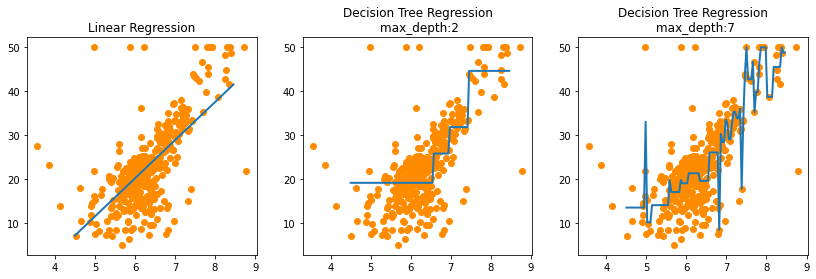

In [30]:
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(14,4), ncols=3)

ax1.set_title('Linear Regression')
ax1.scatter(boston_df_sample.RM, boston_df_sample.PRICE, c='darkorange')
ax1.plot(X_test, pred_lr, label='linear', linewidth=2)

ax2.set_title('Decision Tree Regression\n max_depth:2')
ax2.scatter(boston_df_sample.RM, boston_df_sample.PRICE, c='darkorange')
ax2.plot(X_test, pred_dt2, label='max_depth:2', linewidth=2)

ax3.set_title('Decision Tree Regression\n max_depth:7')
ax3.scatter(boston_df_sample.RM, boston_df_sample.PRICE, c='darkorange')
ax3.plot(X_test, pred_dt7, label='max_depth:7', linewidth=2)

In [31]:
# end of files